# Proyek Akhir: Menyelesaikan Permasalahan Jaya Jaya Institut (Pendidikan)

- Nama: Rafif Idris Ardhana
- Email: a005ybm405@devacademy.id
- Id Dicoding: A005YBM405@devacademy.id

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib
import warnings
warnings.filterwarnings("ignore")

### Menyiapkan data yang akan diguankan

In [2]:
df = pd.read_csv("/content/data.csv", sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Dataset yang digunakan: https://github.com/dicodingacademy/dicoding_dataset/tree/main/students_performance

Dataset ini memiliki fitur-fitur yang banyak, berikut perinciannya.

|Column Name   | Desctiption                                      |
|--------------|--------------------------------------------------|
|Marital Status| Status pernikahan mahasiswa. (Categorical)<br><br>1 - Single<br>2 - Married<br>3 - Widower<br>4 - Divorced<br>5 - Facto union<br>6 - Legally separated |
|Application Mode|Metode aplikasi yang digunakan mahasiswa. (Categorical)<br><br>1 - 1st phase - general contingent<br>2 - Ordinance No. 612/93<br>5 - 1st phase - special contingent (Azores Island)<br>7 - Holders of other higher courses<br>10 - Ordinance No. 854-B/99<br>15 - International student (bachelor)<br>16 - 1st phase - special contingent (Madeira Island)<br>17 - 2nd phase - general contingent<br>18 - 3rd phase - general contingent<br>26 - Ordinance No. 533-A/99, item b2) (Different Plan)<br>27 - Ordinance No. 533-A/99, item b3 (Other Institution)<br>39 - Over 23 years old<br>42 - Transfer<br>43 - Change of course<br>44 - Technological specialization diploma holders<br>51 - Change of institution/course<br>53 - Short cycle diploma holders<br>57 - Change of institution/course (International)|
|Application Order| Urutan aplikasi yang digunakan mahasiswa. (Numerical)<br>Nilai berkisar antara 0 - pilihan pertama hingga 9 - pilihan terakhir |
|Course| Program studi yang diambil mahasiswa. (Categorical)<br><br>33 - Biofuel Production Technologies<br>171 - Animation and Multimedia Design<br>8014 - Social Service (evening attendance)<br>9003 - Agronomy<br>9070 - Communication Design<br>9085 - Veterinary Nursing<br>9119 - Informatics Engineering<br>9130 - Equinculture<br>9147 - Management<br>9238 - Social Service<br>9254 - Tourism<br>9500 - Nursing<br>9556 - Oral Hygiene<br>9670 - Advertising and Marketing Management<br>9773 - Journalism and Communication<br>9853 - Basic Education<br>9991 - Management (evening attendance) |
|Daytime/Evening Attandance| Waktu kuliah mahasiswa. (Categorical)<br><br>1 - Daytime<br>0 - Evening |
|Previous qualification|Kualifikasi akademik sebelum mendaftar. (Categorical)<br><br>1 - Secondary education<br>2 - Higher education - bachelor's degree<br>3 - Higher education - degree<br>4 - Higher education - master's<br>5 - Higher education - doctorate<br>6 - Frequency of higher education<br>9 - 12th year of schooling - not completed<br>10 - 11th year of schooling - not completed<br>12 - Other - 11th year of schooling<br>14 - 10th year of schooling<br>15 - 10th year of schooling - not completed<br>19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.<br>38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.<br>39 - Technological specialization course<br>40 - Higher education - degree (1st cycle)<br>42 - Professional higher technical course<br>43 - Higher education - master (2nd cycle) |
|Previous qualification (grade)     | Nilai kualifikasi sebelumnya. (Numerical)<br>Nilai berkisar antara 0 hingga 200                         |
| Nationality                         | Kewarganegaraan mahasiswa. (Categorical)<br><br>1 - Portuguese<br>2 - German<br>6 - Spanish<br>11 - Italian<br>13 - Dutch<br>14 - English<br>17 - Lithuanian<br>21 - Angolan<br>22 - Cape Verdean<br>24 - Guinean<br>25 - Mozambican<br>26 - Santomean<br>32 - Turkish<br>41 - Brazilian<br>62 - Romanian<br>100 - Moldova (Republic of)<br>101 - Mexican<br>103 - Ukrainian<br>105 - Russian<br>108 - Cuban<br>109 - Colombian |
| Mother's qualification             | Pendidikan ibu dari mahasiswa. (Categorical)<br><br>1 - Secondary Education - 12th Year of Schooling or Eq.<br>2 - Higher Education - Bachelor's Degree<br>3 - Higher Education - Degree<br>4 - Higher Education - Master's<br>5 - Higher Education - Doctorate<br>6 - Frequency of Higher Education<br>9 - 12th Year of Schooling - Not Completed<br>10 - 11th Year of Schooling - Not Completed<br>11 - 7th Year (Old)<br>12 - Other - 11th Year of Schooling<br>14 - 10th Year of Schooling<br>18 - General commerce course<br>19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>22 - Technical-professional course<br>26 - 7th year of schooling<br>27 - 2nd cycle of the general high school course<br>29 - 9th Year of Schooling - Not Completed<br>30 - 8th year of schooling<br>34 - Unknown<br>35 - Can't read or write<br>36 - Can read without having a 4th year of schooling<br>37 - Basic education 1st cycle (4th/5th year) or equiv.<br>38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>39 - Technological specialization course<br>40 - Higher education - degree (1st cycle)<br>41 - Specialized higher studies course<br>42 - Professional higher technical course<br>43 - Higher Education - Master (2nd cycle)<br>44 - Higher Education - Doctorate (3rd cycle) |
| Father's qualification             | Pendidikan ayah dari mahasiswa. (Categorical)<br><br>1 - Secondary Education - 12th Year of Schooling or Eq.<br>2 - Higher Education - Bachelor's Degree<br>3 - Higher Education - Degree<br>4 - Higher Education - Master's<br>5 - Higher Education - Doctorate<br>6 - Frequency of Higher Education<br>9 - 12th Year of Schooling - Not Completed<br>10 - 11th Year of Schooling - Not Completed<br>11 - 7th Year (Old)<br>12 - Other - 11th Year of Schooling<br>13 - 2nd year complementary high school course<br>14 - 10th Year of Schooling<br>18 - General commerce course<br>19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>20 - Complementary High School Course<br>22 - Technical-professional course<br>25 - Complementary High School Course - not concluded<br>26 - 7th year of schooling<br>27 - 2nd cycle of the general high school course<br>29 - 9th Year of Schooling - Not Completed<br>30 - 8th year of schooling<br>31 - General Course of Administration and Commerce<br>33 - Supplementary Accounting and Administration<br>34 - Unknown<br>35 - Can't read or write<br>36 - Can read without having a 4th year of schooling<br>37 - Basic education 1st cycle (4th/5th year) or equiv.<br>38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>39 - Technological specialization course<br>40 - Higher education - degree (1st cycle)<br>41 - Specialized higher studies course<br>42 - Professional higher technical course<br>43 - Higher Education - Master (2nd cycle)<br>44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation                | Pekerjaan ibu dari mahasiswa. (Categorical)<br><br>0 - Student<br>1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers<br>2 - Specialists in Intellectual and Scientific Activities<br>3 - Intermediate Level Technicians and Professions<br>4 - Administrative staff<br>5 - Personal Services, Security and Safety Workers and Sellers<br>6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry<br>7 - Skilled Workers in Industry, Construction and Craftsmen<br>8 - Installation and Machine Operators and Assembly Workers<br>9 - Unskilled Workers<br>10 - Armed Forces Professions<br>90 - Other Situation<br>99 - (blank)<br>122 - Health professionals<br>123 - teachers<br>125 - Specialists in information and communication technologies (ICT)<br>131 - Intermediate level science and engineering technicians and professions<br>132 - Technicians and professionals, of intermediate level of health<br>134 - Intermediate level technicians from legal, social, sports, cultural and similar services<br>141 - Office workers, secretaries in general and data processing operators<br>143 - Data, accounting, statistical, financial services and registry-related operators<br>144 - Other administrative support staff<br>151 - personal service workers<br>152 - sellers<br>153 - Personal care workers and the like<br>171 - Skilled construction workers and the like, except electricians<br>173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like<br>175 - Workers in food processing, woodworking, clothing and other industries and crafts<br>191 - cleaning workers<br>192 - Unskilled workers in agriculture, animal production, fisheries and forestry<br>193 - Unskilled workers in extractive industry, construction, manufacturing and transport<br>194 - Meal preparation assistants |
| Father's occupation                | Pekerjaan ayah dari mahasiswa. (Categorical)<br><br>0 - Student<br>1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers<br>2 - Specialists in Intellectual and Scientific Activities<br>3 - Intermediate Level Technicians and Professions<br>4 - Administrative staff<br>5 - Personal Services, Security and Safety Workers and Sellers<br>6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry<br>7 - Skilled Workers in Industry, Construction and Craftsmen<br>8 - Installation and Machine Operators and Assembly Workers<br>9 - Unskilled Workers<br>10 - Armed Forces Professions<br>90 - Other Situation<br>99 - (blank)<br>101 - Armed Forces Officers<br>102 - Armed Forces Sergeants<br>103 - Other Armed Forces personnel<br>112 - Directors of administrative and commercial services<br>114 - Hotel, catering, trade and other services directors<br>121 - Specialists in the physical sciences, mathematics, engineering and related techniques<br>122 - Health professionals<br>123 - teachers<br>124 - Specialists in finance, accounting, administrative organization, public and commercial relations<br>131 - Intermediate level science and engineering technicians and professions<br>132 - Technicians and professionals, of intermediate level of health<br>134 - Intermediate level technicians from legal, social, sports, cultural and similar services<br>135 - Information and communication technology technicians<br>141 - Office workers, secretaries in general and data processing operators<br>143 - Data, accounting, statistical, financial services and registry-related operators<br>144 - Other administrative support staff<br>151 - personal service workers<br>152 - sellers<br>153 - Personal care workers and the like<br>154 - Protection and security services personnel<br>161 - Market-oriented farmers and skilled agricultural and animal production workers<br>163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence<br>171 - Skilled construction workers and the like, except electricians<br>172 - Skilled workers in metallurgy, metalworking and similar<br>174 - Skilled workers in electricity and electronics<br>175 - Workers in food processing, woodworking, clothing and other industries and crafts<br>181 - Fixed plant and machine operators<br>182 - assembly workers<br>183 - Vehicle drivers and mobile equipment operators<br>192 - Unskilled workers in agriculture, animal production, fisheries and forestry<br>193 - Unskilled workers in extractive industry, construction, manufacturing and transport<br>194 - Meal preparation assistants<br>195 - Street vendors (except food) and street service providers |
| Admission grade                   | Nilai masuk universitas. (Numerical) <br>Nilai berkisar antara 0 hingga 200                                      |
| Displaced                         | Apakah mahasiswa merupakan perantau?. (Categorical)<br><br>1 – yes<br>0 – no |
| Educational special needs         | Apakah mahasiswa memiliki pendidikan berkebutuhan khusus?. (Categorical)<br><br>1 – yes<br>0 – no |
| Debtor                            | Apakah mahasiswa memiliki tunggakan biaya?. (Categorical)<br><br>1 – yes<br>0 – no     |
| Tuition fees up to date           | Apakah biaya kuliah mahasiswa telah dibayarkan?. (Categorical)<br><br>1 – yes<br>0 – no |
| Gender                            | Jenis kelamin mahasiwa. (Categorical)<br><br>1 – male<br>0 – female      |
| Scholarship holder                | Apakah mahasiswa menerima beasiswa?. (Categorical)<br><br>1 – yes<br>0 – no |
| Age at enrollment                 | Usia mahasiswa saat mendaftar. (Numerical)            |
| International                     | Apakah merupakan mahasiswa Internasional?. (Categorical)<br><br>1 – yes<br>0 – no |
| Curricular units 1st sem (credited)| Jumlah mata kuliah yang tidak perlu diambil lagi oleh mahasiswa pada semester pertama. (Numerical) |
| Curricular units 1st sem (enrolled)| Jumlah mata kuliah yang diambil mahasiswa pada semester pertama. (Numerical) |
| Curricular units 1st sem (evaluations) | Jumlah mata kuliah yang mendapatkan penilaian pada semester pertama. (Numerical) |
| Curricular units 1st sem (approved)        | Jumlah mata kuliah yang berhasil diselesaikan oleh mahasiswa pada semester pertama. (Numerical)                               |
| Curricular units 1st sem (grade)           | Nilai rata-rata mata kuliah pada semester pertama. (Numerical)  <br> Nilai berkisar antara 0 hingga 20                                 |
| Curricular units 1st sem (without evaluations) | Jumlah mata kuliah yang tidak mendapatkan penilaian pada semester pertama (Numerical)                   |
| Curricular units 2nd sem (credited)       | Jumlah mata kuliah yang tidak perlu diambil lagi oleh mahasiswa pada semester kedua (Numerical)                              |
| Curricular units 2nd sem (enrolled)       | Jumlah mata kuliah yang diambil mahasiswa pada semester kedua. (Numerical)                              |
| Curricular units 2nd sem (evaluations)    | Jumlah mata kuliah yang mendapatkan penilaian pada semester kedua. (Numerical)                        |
| Curricular units 2nd sem (approved)            | Jumlah mata kuliah yang berhasil diselesaikan oleh mahasiswa pada semester kedua. (Numerical)                                                 |
| Curricular units 2nd sem (grade)               | GNilai rata-rata mata kuliah pada semester kedua. (Numerical)  <br> Nilai berkisar antara 0 hingga 20(Numerical)                                                   |
| Curricular units 2nd sem (without evaluations)  | Jumlah mata kuliah yang tidak mendapatkan penilaian pada semster kedua. (Numerical)                                      |
| Unemployment rate                              | Tingkat pengangguran (%) (Continuous)                                                                                  |
| Inflation rate                                 | Tingkat inflasi (%) (Continuous)                                                                                     |
| GDP                                            | Nilai GDP (Produk Domestik Bruto) (Continuous)                                                                                                    |
| Target                                         | Target. label output yang diklasifikasikan ke dalam tiga kategori. (Categorical)<br><br> - Dropout<br> - Enrolled<br> - Graduate |

Acknowledgement: Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

## Assesing Data

In [3]:
# Cek shape dataset
print(f"{df.shape[0]} baris dan {df.shape[1]} kolom")

4424 baris dan 37 kolom


Terdapat 4.424 baris dan 37 kolom pada dataset yang akan digunakan

In [4]:
# Cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Fitur-fitur dataset memiliki tipe data integer, float, dan object. Tetapi terdapat beberapa fitur yang nama kolomnya tidak sesuai (seperti "Nacionality") serta kolom ("Marital_status, Application_mode, Course, dan lainnya) yang seharusnya bertipe kategorikal (category) tetapi dalam dataset bertipe numerikal dan object.

Tahap perbaikan akan dilakukan saat tahap cleaning data, setelah itu kita dapat mengecek informasi statistik dari dataset.

In [5]:
# Cek missing value
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Seluruh fitur tidak memiliki missing value

In [6]:
# Cek duplikasi data
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Dataset tidak memiliki duplikasi data

## Cleaning Data

In [7]:
# Copy data df menjadi dataset baru
df_student = df.copy()

# Merubah nama kolom "Nacionality" menjadi "Nationality"
df_student.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

# Membuat daftar kolom untuk dirubah menjadi tipe kategori
categorical_columns =[
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nationality',
    'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced',
    'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Status'
]

df_student[categorical_columns] = df_student[categorical_columns].astype('category')
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Marital_status                                4424 non-null   category
 1   Application_mode                              4424 non-null   category
 2   Application_order                             4424 non-null   int64   
 3   Course                                        4424 non-null   category
 4   Daytime_evening_attendance                    4424 non-null   category
 5   Previous_qualification                        4424 non-null   category
 6   Previous_qualification_grade                  4424 non-null   float64 
 7   Nationality                                   4424 non-null   category
 8   Mothers_qualification                         4424 non-null   category
 9   Fathers_qualification                         4424 n

Membuat dataset baru "df_student" dengan melakukan copy terhadap dataset "df" guna tetap menyimpan orisinil dataset, kemudian mengubah nama kolom "Nacionality" menjadi "Nationality", serta merubah tipe data pada kolom yang seharusnya bertipe data kategorikal menjadi "category".

Setelah ini kita sudah dapat mengecek informasi statistik agar lebih jelas

In [8]:
# Menilai statistik dataset
df_student.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,6.0,1.0,3919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Application_mode,4424.0,18.0,1.0,1708.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Application_order,4424.0,NaN,NaN,NaN,1.727848,1.313793,0.0,1.0,1.0,2.0,9.0
Course,4424.0,17.0,9500.0,766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daytime_evening_attendance,4424.0,2.0,1.0,3941.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previous_qualification,4424.0,17.0,1.0,3717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Previous_qualification_grade,4424.0,NaN,NaN,NaN,132.613314,13.188332,95.0,125.0,133.1,140.0,190.0
Nationality,4424.0,21.0,1.0,4314.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mothers_qualification,4424.0,29.0,1.0,1069.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fathers_qualification,4424.0,34.0,37.0,1209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informasi statistik dianggap normal, sehingga kita dapat melangkah ke tahap selanjutnya

In [9]:
# Menyimpan data hasil cleaning
df_student.to_csv("data_clean.csv", index=False)

Data hasil cleaning disimpan ke dalam format csv sebagai bahan dataset pada dashboard

## Exploratory Data Analysis

          Jumlah siswa  Persentase
Status                            
Dropout           1421        32.1
Enrolled           794        17.9
Graduate          2209        49.9


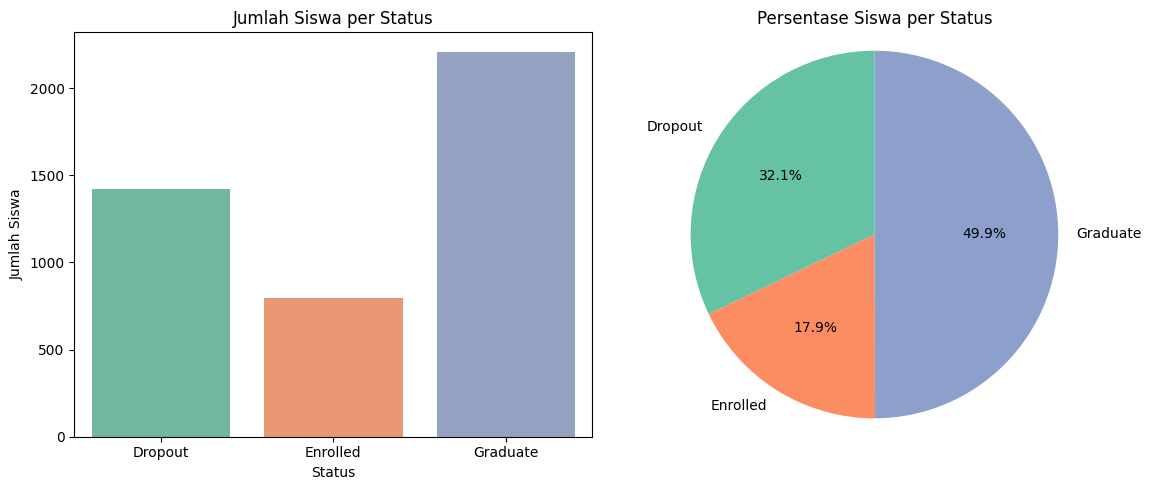

In [10]:
# Distribusi kolom target "Status"
# Hitung jumlah dan persentase
count = df_student["Status"].value_counts()
percent = 100 * df_student["Status"].value_counts(normalize=True)
df_status = pd.DataFrame({"Jumlah siswa": count, "Persentase": percent.round(1)})

# Atur urutan index
order = ["Dropout", "Enrolled", "Graduate"]
df_status = df_status.reindex(order)
print(df_status)

# Visualisasi distribusi
# Buat subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart - Jumlah siswa
sns.barplot(x=df_status.index, y="Jumlah siswa", data=df_status, palette="Set2", ax=axs[0])
axs[0].set_title("Jumlah Siswa per Status")
axs[0].set_ylabel("Jumlah Siswa")
axs[0].set_xlabel("Status")

# Pie Chart - Persentase
axs[1].pie(df_status["Persentase"], labels=df_status.index, autopct='%1.1f%%',
           startangle=90, colors=sns.color_palette("Set2"))
axs[1].set_title("Persentase Siswa per Status")
axs[1].axis('equal')

plt.tight_layout()
plt.show()

Dari grafik di atas dapat disimpulkan bahwa sebagian besar mahasiswa telah lulus sebanyak 2.209 mahasiswa (49.9%), sedangkan mahasiswa terdaftar sebanyak 794 mahasiswa (17.9%). Untuk siswa dropout terlihat angka yang signifikan di 1.421 mahasiswa (32.1%)

Nilai Korelasi terhadap 'Status':
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Fathers_occupation                              0.051702
Mothers_occupation                              0.0484

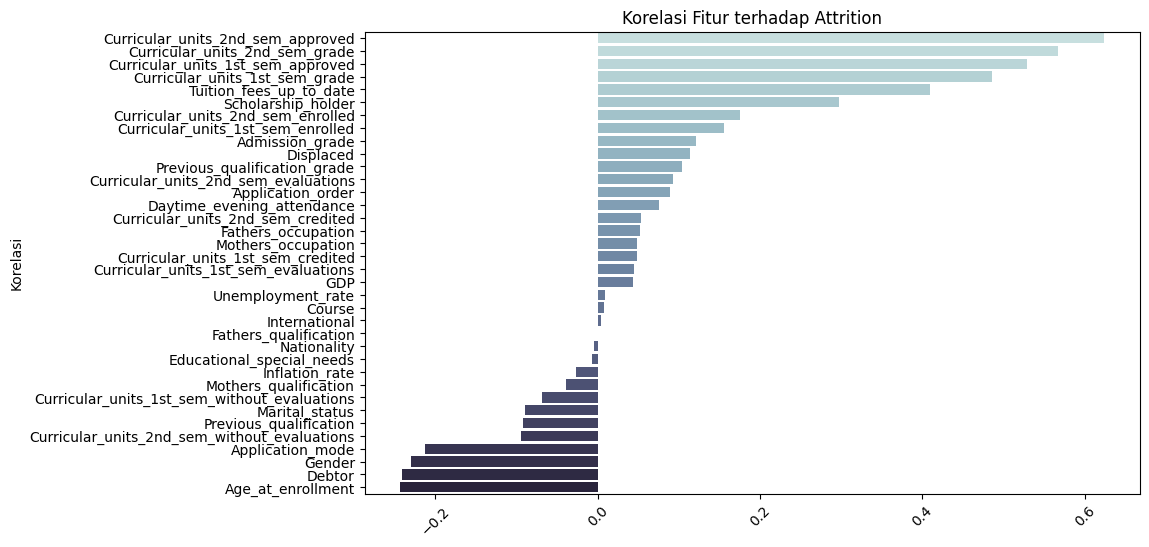

In [11]:
# Correlation Feature terhadap Status

df_encoded = df_student.copy()

# Encode kolom kategorikal
label_encoder_df = LabelEncoder()
categorical_columns = df_encoded.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    df_encoded[column] = label_encoder_df.fit_transform(df_encoded[column])

# Hitung korelasi antar kolom
corr = df_encoded.corr()

# Ambil korelasi terhadap target 'Status'
corr_status = corr["Status"].sort_values(ascending=False)

# Hapus kolom 'Status' dari data yang akan dipakai untuk visualisasi
corr_status = corr_status.drop("Status")

# Tampilkan nilai korelasi
print("Nilai Korelasi terhadap 'Status':")
print(corr_status)

# Plot korelasi dalam bentuk bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=corr_status.values, y=corr_status.index, palette='ch:start=.2,rot=-.3')
plt.title('Korelasi Fitur terhadap Attrition')
plt.xticks(rotation=45)
plt.ylabel('Korelasi')
plt.show()

**Dua Faktor Teratas dengan Korelasi Positif Terkuat terhadap Status:**

1. **Curricular_units_2nd_sem_approved: 0.624157**\
Jumlah mata kuliah yang disetujui di semester 2 berpengaruh terhadap status mahasiswa. Semakin baik performa akademik mahasiswa, mahasiswa berkemungkinan akan memperoleh kelulusan. Sebaliknya, performa akademik yang buruk, berkemungkinan Dropout.

2. **Curricular_units_2nd_sem_grade: 0.566827**\
Nilai mata kuliah pada semester 2 berpengaruh terhadap status mahasiswa. Mahasiswa yang memiliki nilai tinggi, berkemungkinan lulus. Sedangkan mahasiswa yang memiliki nilai rendah, berkemungkinan Dropout.

**Catatan:** Faktor pada semester 1 serupa secara konteks dengan dua faktor di atas. Meskipun berbeda nilai korelasinya, namun tetap memiliki korelasi yang tinggi.

**Dua Faktor Teratas dengan Korelasi Negatif Terkuat terhadap Status:**

1. **Age_at_enrollment: -0.243438**\
Mahasiswa yang berumur lebih tua saat memulai studi memiliki risiko Dropout yang tinggi. Sedangkan mahasiswa yang berumur lebih muda saat memulai studi mampu mengikuti studi hingga lulus.

2. **Debtor: -0.240999**\
Mahasiswa yang memiliki tunggakan biaya cenderung Dropout, sehingga status sebagai debitur dapat memperbesar risiko Dropout

Selanjutnya ialah memilih fitur untuk dianalisis. Pemilihan fitur yang akan dianalisis didasari oleh korelasi yang dianggap signifikan dari beberapa fitur terhadap kolom target "Status" sesuai hasil visualisasi korelasi di atas.

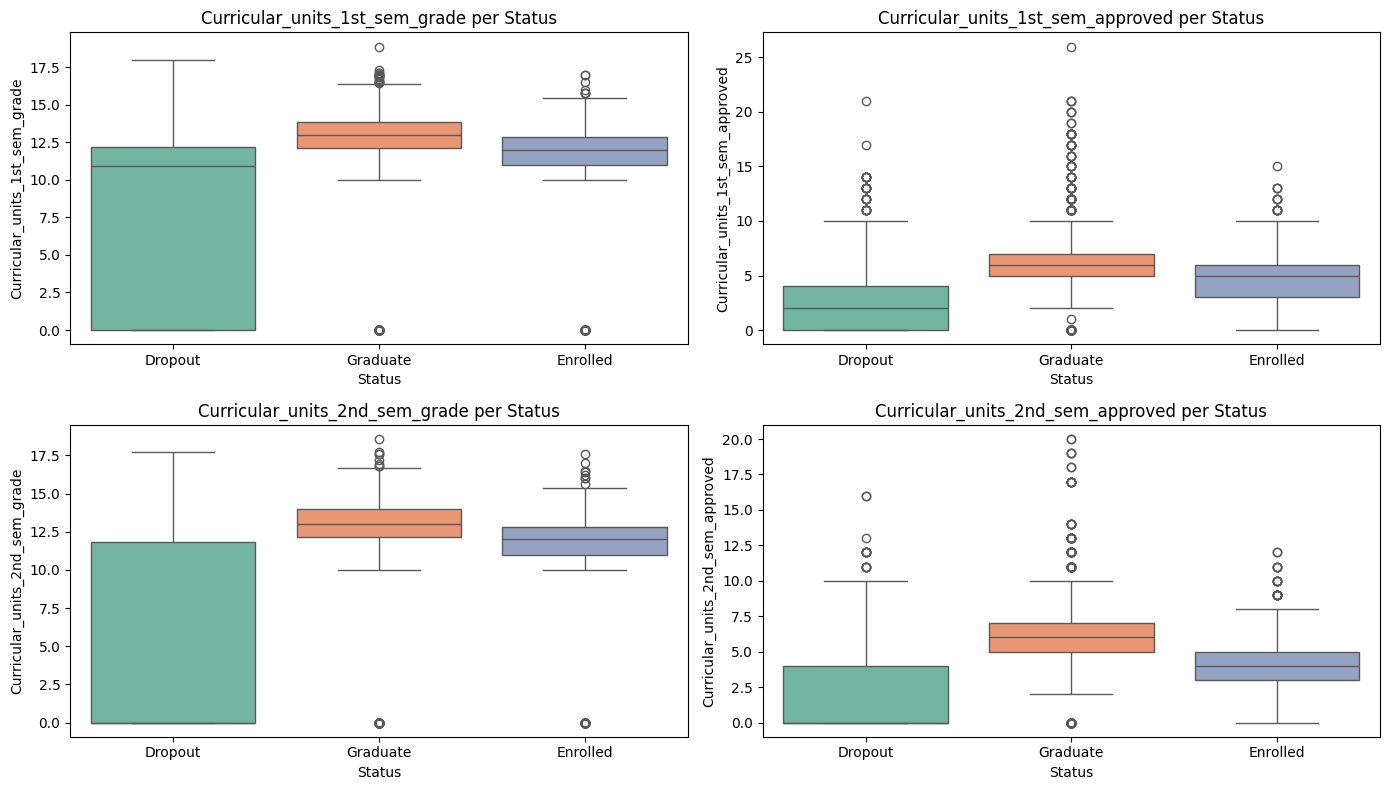

In [12]:
# Analisis fitur akademik "Grade" dan "Approved" terhadap Status
features = ['Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_approved',
            'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_approved']

fig, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.ravel()
for i, col in enumerate(features):
    sns.boxplot(data=df, x='Status', y=col, ax=axs[i], palette="Set2")
    axs[i].set_title(f"{col} per Status")

plt.tight_layout()
plt.show()

Berdasarkan grafik boxplot di atas dapat disimpulkan sebagai berikut.\
**1. Curricular_units_1st_sem_grade per Status**
- Mahasiswa Dropout memiliki distribusi nilai semester 1 yang lebih lebar ke bawah, yaitu banyak nilai rendah (termasuk nol)
- Mahasiswa Graduate dan Enrolled memiliki distribusi nilai yang konsisten dan tinggi

**2. Curricular_units_1st_sem_approved per Status**
- Mahasiswa Dropout menyelesaikan lebih sedikit atau bahkan tidak ada mata kuliah pada semester 1
- Graduate dan Enrolled menunjukkan jumlah yang lebih tinggi dan stabil

**3. Curricular_units_2nd_sem_grade per Status**
- Terdapat pola yang mirip seperti semester 1, mahasiswa Dropout menunjukkan nilai lebih bervariasi dan banyak yang rendah
- Mahasiswa Graduate dan Enrolled konsisten memiliki nilai lebih baik

**4. Curricular_units_2nd_sem_approved per Status**
- Mahasiswa Dropout hanya menyelesaikan sedikit mata kuliah
- Mahasiswa Graduate dan Enrolled menyelesaikan lebih banyak dan lebih stabil

**Kesimpulan**
- Performa akademik yang buruk (nilai yang rendah dan sedikit mata kuliah yang selesai) sangat berkaitan dengan kemungkinan Dropout
- Mahasiswa yang lulus cenderung memiliki performa akademik yang baik (stabil dan tinggi)  

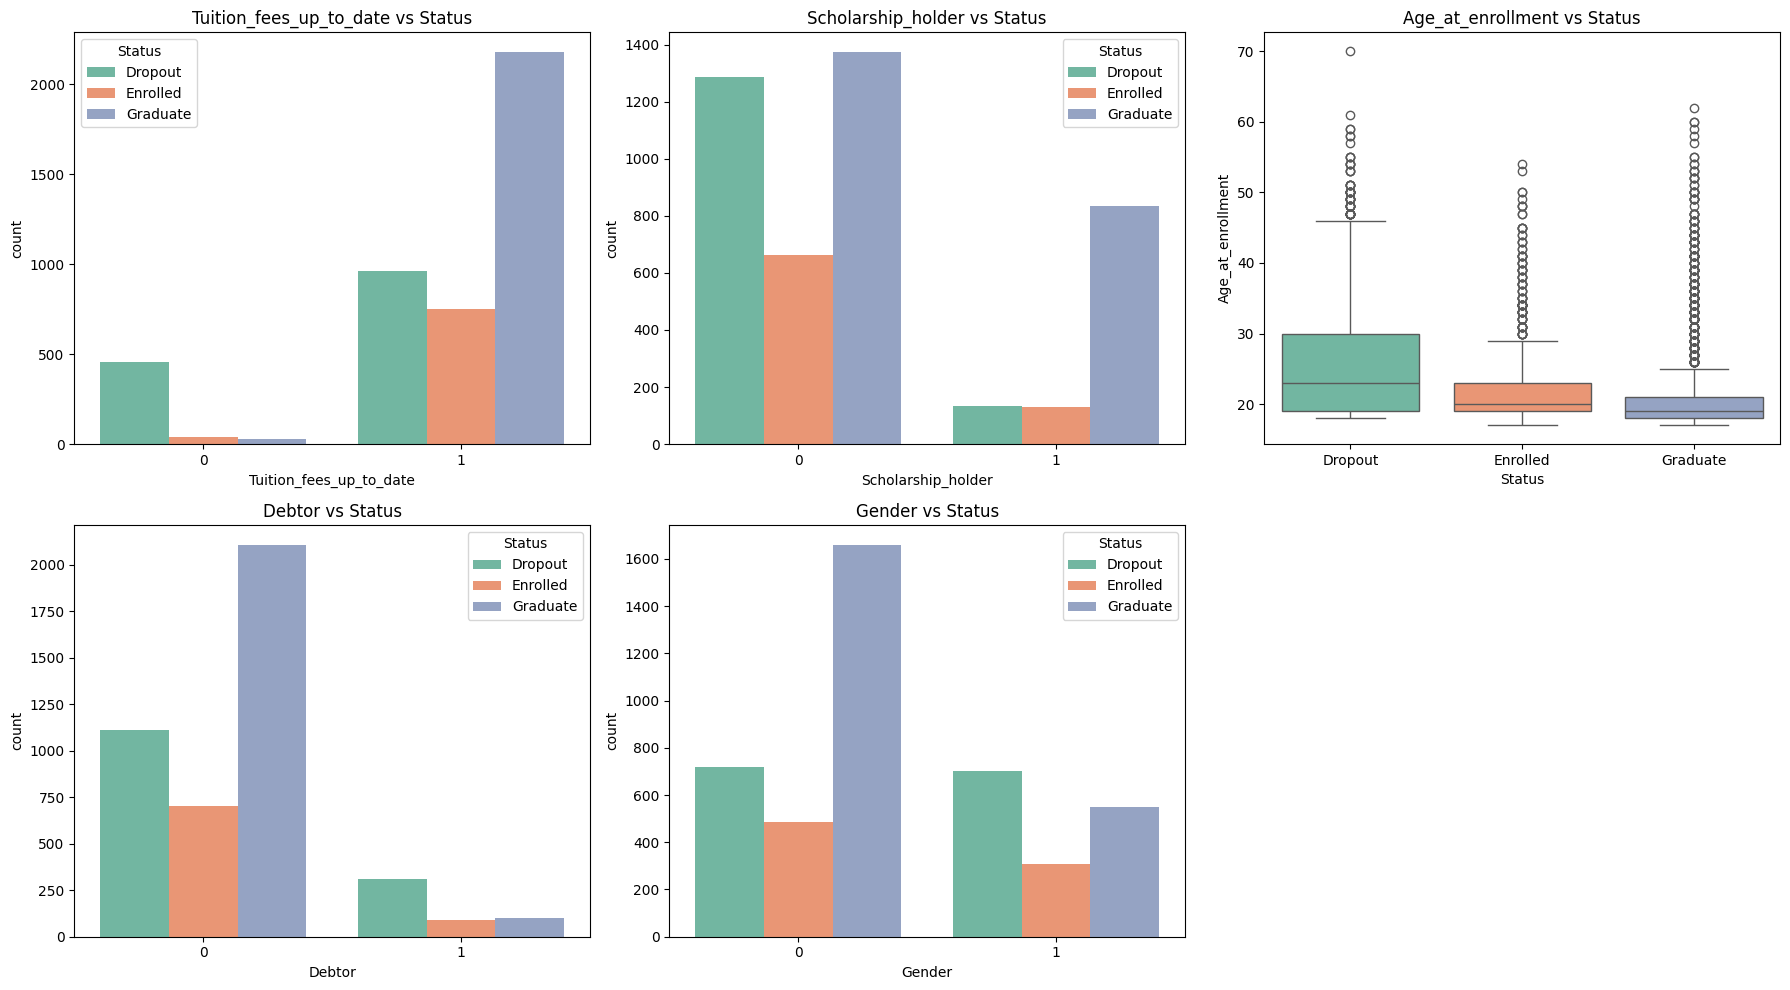

In [13]:
# Analisis fitur non-akademik terhadap Status

# Mendefinisikan fitur yang akan diplot
plot_features = {
    "Tuition_fees_up_to_date": "countplot",
    "Scholarship_holder": "countplot",
    "Age_at_enrollment": "boxplot",
    "Debtor": "countplot",
    "Gender": "countplot"
}

# Membuat subplot
n = len(plot_features)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axs = axs.flatten()

# Looping visualisasi
for i, (col, plot_type) in enumerate(plot_features.items()):
  ax = axs[i]
  if plot_type == "countplot":
        sns.countplot(data=df_student, x=col, hue="Status", ax=ax, palette="Set2")
        ax.set_title(f"{col} vs Status")
  elif plot_type == "boxplot":
        sns.boxplot(data=df_student, x="Status", y=col, ax=ax, palette="Set2")
        ax.set_title(f"{col} vs Status")

# Abaikan subplot kosong jika jumlah kolom tidak pas
for j in range(i+1, len(axs)):
  axs[j].axis("off")

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas dapat disimpukan sebagai berikut.\
**1. Tuition_fees_up_to_date vs Status**
- Mahasiswa yang tidak membayar biaya kuliah tepat waktu (0) didominasi oleh mahasiswa yang Dropout
- Mahasiswa yang membayar biaya kuliah tepat waktu (1) di dominasi oleh mahasiswa yang Graduate

**2. Sholarship_holder vs Status**
- Sebagian besar siswa yang Dropout ialah mahasiswa yang tidak menerima beasiswa (0). Di samping itu mahasiswa yang Graduate juga terbilang banyak meskipun tidak menerima beasiswa
- Mahasiswa penerima beasiswa (1), sebagian besar mencapai kelulusan

**3. Age_at_enrollment vs Status**
- Mahasiswa yang memulai studi dengan umur yang lebih tua cenderung Dropout
- Mahasiswa yang Graduate dan Enrolled umumnya memulai studi di usia yang lebih muda

**4. Debtor vs Status**
- Mahasiswa yang tidak punya tunggakan biaya (0), didominasi oleh mahasiswa yang Graduate
- Mahasiswa yang memiliki tunggakan biaya (1), lebih banyak yang Dropout

**5. Gender vs Status**
- Jumlah mahasiswa perempuan (0) yang Graduate lebih tinggi dibandikan laki-laki (1)
- Distribusi Dropout dan Enrolled terlihat cukup berimbang antar gender

## Data Preparation / Preprocessing

## Feature Selection

**Fitur yang dipilih:**
- Curricular_units_2nd_sem_approved
- Curricular_units_2nd_sem_grade
- Curricular_units_1st_sem_approved
- Curricular_units_1st_sem_grade
- Tuition_fees_up_to_date
- Scholarship_holder
- Gender
- Debtor
- Age_at_enrollment

**Include Fitur Target:**
- Status

**Analisis yang dipertimbangkan dalam melakukan seleksi fitur**
- **Curricular_units_2nd_sem_approved – 0.624157:**\
Korelasi sangat tinggi, indikator kuat apakah mahasiswa aktif belajar dan mampu menyelesaikan semester kedua.

- **Curricular_units_2nd_sem_grade – 0.566827:**\
Hubungan positif ini mengindikasikan bahwa nilai tinggi mencerminkan keterlibatan yang baik.

- **Curricular_units_1st_sem_approved – 0.529123:**\
Memiliki konteks yang sama pada faktor di semester 2, serta memiliki korelasi positif yang tinggi.

- **Curricular_units_1st_sem_grade – 0.485207:**\
Memiliki konteks yang sama pada faktor di semester 2, serta memiliki korelasi positif yang tinggi.

- **Tuition_fees_up_to_date – 0.409827:**\
Pembayaran tepat waktu biasanya berkaitan dengan status kelulusan, hal ini berpotensi menjadi indikator finansial & komitmen terhadap studi.

- **Scholarship_holder – 0.297595:**\
Dukungan beasiswa dapat membantu mahasiswa bertahan hingga lulus, korelasi di angka yang sedang tetapi masih logis.

- **Gender – -0.229270:**\
Korelasi negatif yang cukup besar. Gender bisa punya pengaruh terhadap Dropout dalam konteks tertentu.

- **Debtor – -0.240999:**\
Korelasi negatif menunjukkan bahwa memiliki utang bisa terkait dengan peningkatan risiko Dropout.

- **Age_at_enrollment – -0.243438:**\
Umur lebih tua saat memulai studi bisa berkaitan dengan tanggung jawab lain, mungkin sudah bekerja atau berkeluarga, sehingga berisiko Dropout.

Fitur-fitur ini dianggap sebagai fitur yang baik digunakan dalam modeling prediksi

In [14]:
# Feature Selection
selected_features = [
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Tuition_fees_up_to_date",
    "Scholarship_holder",
    "Gender",
    "Debtor",
    "Age_at_enrollment",
    "Status"
]

# Membuat dataframe selection
df_selection = df_student[selected_features]
df_selection.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Gender,Debtor,Age_at_enrollment,Status
0,0,0.000000,0,0.000000,1,0,1,0,20,Dropout
1,6,13.666667,6,14.000000,0,0,1,0,19,Graduate
2,0,0.000000,0,0.000000,0,0,1,0,19,Dropout
3,5,12.400000,6,13.428571,1,0,0,0,20,Graduate
4,6,13.000000,5,12.333333,1,0,0,0,45,Graduate


In [15]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Curricular_units_2nd_sem_approved  4424 non-null   int64   
 1   Curricular_units_2nd_sem_grade     4424 non-null   float64 
 2   Curricular_units_1st_sem_approved  4424 non-null   int64   
 3   Curricular_units_1st_sem_grade     4424 non-null   float64 
 4   Tuition_fees_up_to_date            4424 non-null   category
 5   Scholarship_holder                 4424 non-null   category
 6   Gender                             4424 non-null   category
 7   Debtor                             4424 non-null   category
 8   Age_at_enrollment                  4424 non-null   int64   
 9   Status                             4424 non-null   category
dtypes: category(5), float64(2), int64(3)
memory usage: 195.2 KB


## Encoding Feature

In [16]:
# Encoding fitur target "Status"
feature_mapping = {"Dropout": 1, "Enrolled": 0, "Graduate": 0}
df_selection_encoded = df_selection.copy()
df_selection_encoded["Status"] = df_selection_encoded["Status"].map(feature_mapping)

df_selection_encoded.head()

,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Gender,Debtor,Age_at_enrollment,Status
0,0,0.000000,0,0.000000,1,0,1,0,20,1
1,6,13.666667,6,14.000000,0,0,1,0,19,0
2,0,0.000000,0,0.000000,0,0,1,0,19,1
3,5,12.400000,6,13.428571,1,0,0,0,20,0
4,6,13.000000,5,12.333333,1,0,0,0,45,0


Melakukan encoding terhadap kolom target dengan mapping fitur, jika Dropout adalah 1, selain Dropout adalah 0

## Split Data

In [17]:
# Split data fitur dan target
X = df_selection_encoded.drop("Status", axis=1)
y = df_selection_encoded["Status"]

Melakukan pemisahan fitur dan target pada dataset

## Feature Scaling

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Melakukan standarisasi terhadap kolom numerikal

## Train-test Split

In [19]:
# Membagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hasil
print(f"Jumlah data train: {X_train.shape[0]}")
print(f"Jumlah data test: {X_test.shape[0]}")

Jumlah data train: 3539
Jumlah data test: 885


Membagi dataset menjadi data latih dan data uji dengan perbandingan 80/20

## Modeling

Model dibangun menggunakan algoritma Gradient Boosting Classifier, dan dilatih menggunakan hasil data split sebanyak 80% dari total keseluruhan data yang ada

In [20]:
# Inisialisasi model
model = GradientBoostingClassifier(n_estimators=150, max_depth=3, learning_rate=0.05, random_state=42)

# Melakukan training model
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=150,
                           random_state=42)

In [21]:
# Save model dan scaler
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Berhasil menyimpan model dalam bentuk 'model.pkl'")
print("Berhasil menyimpan scaler dalam bentuk 'scaler.pkl'")

Berhasil menyimpan model dalam bentuk 'model.pkl'
Berhasil menyimpan scaler dalam bentuk 'scaler.pkl'


Menyimpan model dan scaler untuk melakukan deployment pada file `app.py`

## Evaluation

Akurasi model: 0.8418

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       569
           1       0.83      0.70      0.76       316

    accuracy                           0.84       885
   macro avg       0.84      0.81      0.82       885
weighted avg       0.84      0.84      0.84       885



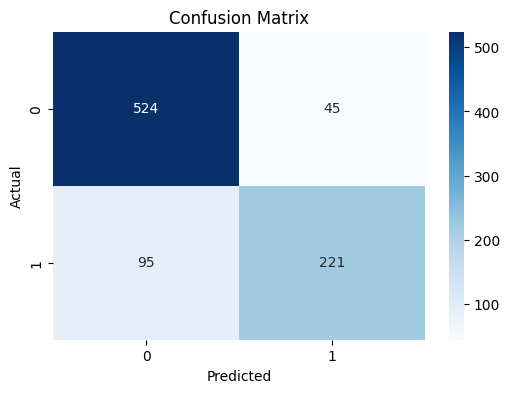

In [22]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Classification Report
print(f"Akurasi model: {accuracy_score(y_test, y_pred):.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Melakukan tahap uji pada model machine learning. Hasil laporan klasifikasi menunjukkan bahwa model mampu memprediksi status siswa dengan persentase akurasi sebesar 84%. Dengan akurasi ini, model dianggap cukup baik dalam melakukan prediksi.

# Deployment

In [23]:
# Load model dan scaler
loaded_model = joblib.load("model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

In [24]:
df_dummy = pd.DataFrame({
    "Curricular_units_2nd_sem_approved": [2],
    "Curricular_units_2nd_sem_grade": [4],
    "Curricular_units_1st_sem_approved": [4],
    "Curricular_units_1st_sem_grade": [2],
    "Tuition_fees_up_to_date": [1], # Biaya kuliah telah dibayarkan
    "Scholarship_holder": [0], # Tidak menerima beasiswa
    "Gender": [1], # Gender laki-laki
    "Debtor": [0], # Tidak memiliki tunggakan biaya
    "Age_at_enrollment": [20]
})

# Scaling dummy input
df_dummy_scaled = loaded_scaler.transform(df_dummy)

# Mapping hasil prediksi
mapping = {0: "Mahasiswa kemungkinan akan Graduate", 1: "Mahasiswa kemungkinan akan Dropout"}

# Prediksi menggunakan model
prediction = loaded_model.predict(df_dummy_scaled)
probabilities = loaded_model.predict_proba(df_dummy_scaled)

# Probabilitas untuk Graduate (Status: 0) dan Dropout (Status: 1)
proba_graduate = probabilities[:, 0] * 100 # Probabilitas untuk Graduate
proba_dropout = probabilities[:, 1] * 100 # Probabilitas untuk Dropout

# Tampilkan hasil
print(f"Prediksi Status: {mapping[prediction[0]]}")
print(f"Probabilitas Graduate: {proba_graduate[0]:.2f}%")
print(f"Probabilitas Dropout: {proba_dropout[0]:.2f}%")

Prediksi Status: Mahasiswa kemungkinan akan Dropout
Probabilitas Graduate: 45.62%
Probabilitas Dropout: 54.38%


In [25]:
!pip freeze > requirements.txt